# ECG Classification

## PART 0 IMPORT LIBRARIES

In [1]:
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder





In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras





## PART 1 DATA ACQUISITION

In [4]:
import os
print(os.listdir()) # Print directories 


['.ipynb_checkpoints', '__notebook_source__.ipynb']


In [5]:
# Print directories in DATASET folder
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/heartbeat/mitbih_train.csv
../input/heartbeat/ptbdb_abnormal.csv
../input/heartbeat/ptbdb_normal.csv
../input/heartbeat/mitbih_test.csv
../input/test1transpose/test1transpose.csv
../input/ecgtest1/test1.txt


In [6]:
#BIH Arrhythmia Dataset
#Arrhythmia Dataset
#Number of Samples: 109446
#Number of Categories: 5
#Sampling Frequency: 125Hz
#Data Source: Physionet's MIT-BIH Arrhythmia Dataset
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

# catenate df and df2 together
mit_test_data = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df2 = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
df = pd.concat([df, df2], axis=0) # Combines the two matrices
del df2
# Example of concat
#s1 = pd.Series(['a', 'b'],['c', 'd'])
#s2 = pd.Series(['e', 'f'],['k', 'l'])
#pd.concat([s1, s2], axis=0)
#c    a
#d    b
#k    e
#l    f

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


# ARDUINO SAMPLES

In [15]:
test= pd.read_csv("../input/ecgtest1/test1.txt", header=None)
test.info

<bound method DataFrame.info of           0    1
0         8  474
1        16  483
2        24  479
3        32  477
4        40  476
...     ...  ...
1010  10352  460
1011  10363  448
1012  10374  450
1013  10386  445
1014  10398   44

[1015 rows x 2 columns]>

Text(0.5, 0, 'ms')

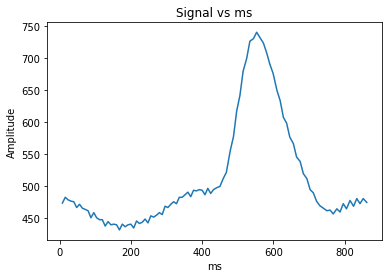

In [16]:
t1=0 #data point index
t2=100 #data point index
plt.plot(test.iloc[t1:t2,0],test.iloc[t1:t2,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

# Normalizing Samples

In [ ]:
test[:][1]

Text(0.5, 0, 'data points')

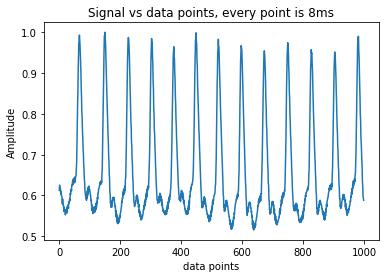

In [17]:
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)


t1=0
t2=1000
plt.plot(normalized[t1:t2,1])
#plt.plot(normalized.iloc[t1:t2,0],normalized.iloc[t1:t2,1])
plt.title('Signal vs data points, every point is 8ms')
plt.ylabel('Amplitude')
plt.xlabel('data points')

In [18]:
dfnormalized = pd.DataFrame(normalized,index=normalized[:,0])

In [21]:
dfnormalized.index = [x for x in range(1, len(dfnormalized.values)+1)]

In [20]:
test[:][0]

0           8
1          16
2          24
3          32
4          40
        ...  
1010    10352
1011    10363
1012    10374
1013    10386
1014    10398
Name: 0, Length: 1015, dtype: int64

In [22]:
dfnormalized.index = [x for x in range(1, len(dfnormalized.values)+1)]

Text(0.5, 0, 'ms')

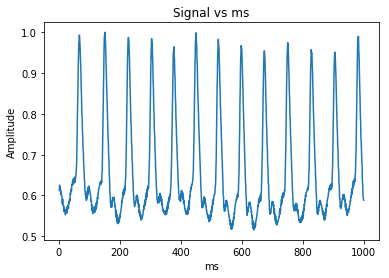

In [23]:
t1=0 #data point index
t2=1000 #data point index
plt.plot(dfnormalized.iloc[t1:t2,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

In [24]:
dfnormalized

,0,1
1,0.000000,0.612536
2,0.000770,0.625356
3,0.001540,0.619658
4,0.002310,0.616809
5,0.003080,0.615385
...,...,...
1011,0.995573,0.592593
1012,0.996631,0.575499
1013,0.997690,0.578348
1014,0.998845,0.571225


## EXPLORATORY DATA ANALYSIS

##  Show one data

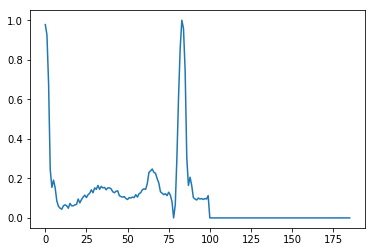

In [25]:
# show one data
plt.plot(mit_train_data.iloc[0,:186])

In [26]:
# Count column 187 values which are the indicators for diseases
equilibre=mit_train_data[187].value_counts()
print(equilibre)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


##  Distribution of categories 

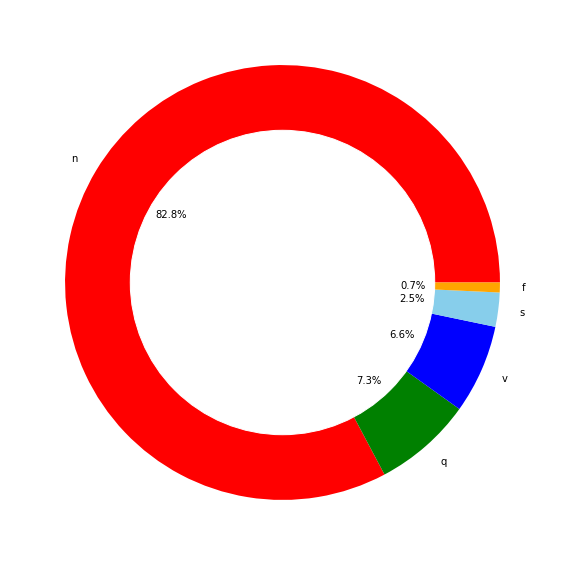

In [27]:
# M plot the circle of value counts in dataset
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## PRODUCE BALANCED DATASET train_df , test_df

In [28]:
# There is a huge difference in the balanced of the classes.
# Better choose the resample technique more than the class weights for the algorithms.
from sklearn.utils import resample

df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=mit_test_data[mit_train_data[187]==1]
df_22=mit_test_data[mit_train_data[187]==2]
df_33=mit_test_data[mit_train_data[187]==3]
df_44=mit_test_data[mit_train_data[187]==4]
df_00=(mit_test_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_11_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_22_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_33_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_44_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [29]:
equilibre=train_df[187].value_counts()
print(equilibre)

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


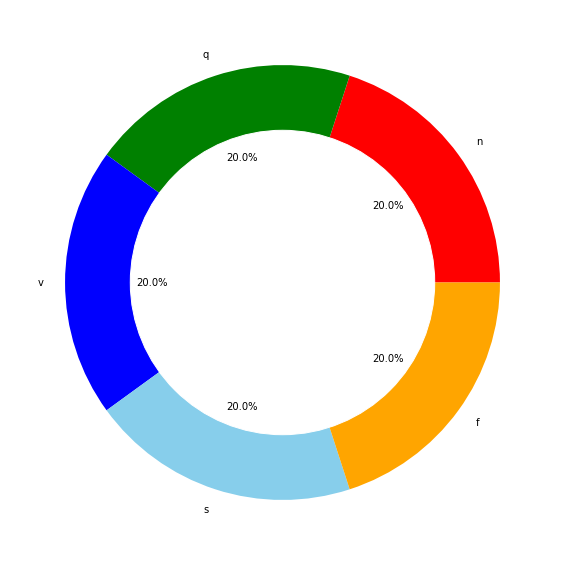

In [30]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [31]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((train_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


##  1-beat ECG for every category

In [32]:
M = mit_train_data.values
X = M[:, :-1]
y = M[:, -1].astype(int) # select last column values for all rows 

In [33]:
C0 = np.argwhere(y == 0).flatten() # Find the indices of array elements that are non-zero, grouped by element.
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

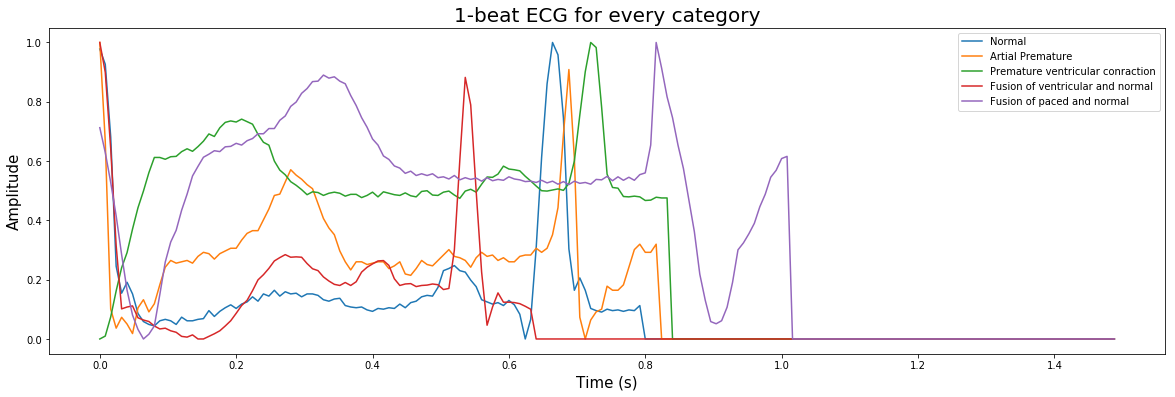

In [34]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X[C0, :][0], label="Normal") # select [0] i.e. first row of normal matrix
plt.plot(x, X[C1, :][0], label="Artial Premature")
plt.plot(x, X[C2, :][0], label="Premature ventricular conraction")
plt.plot(x, X[C3, :][0], label="Fusion of ventricular and normal")
plt.plot(x, X[C4, :][0], label="Fusion of paced and normal")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (s)", fontsize=15)
plt.show()

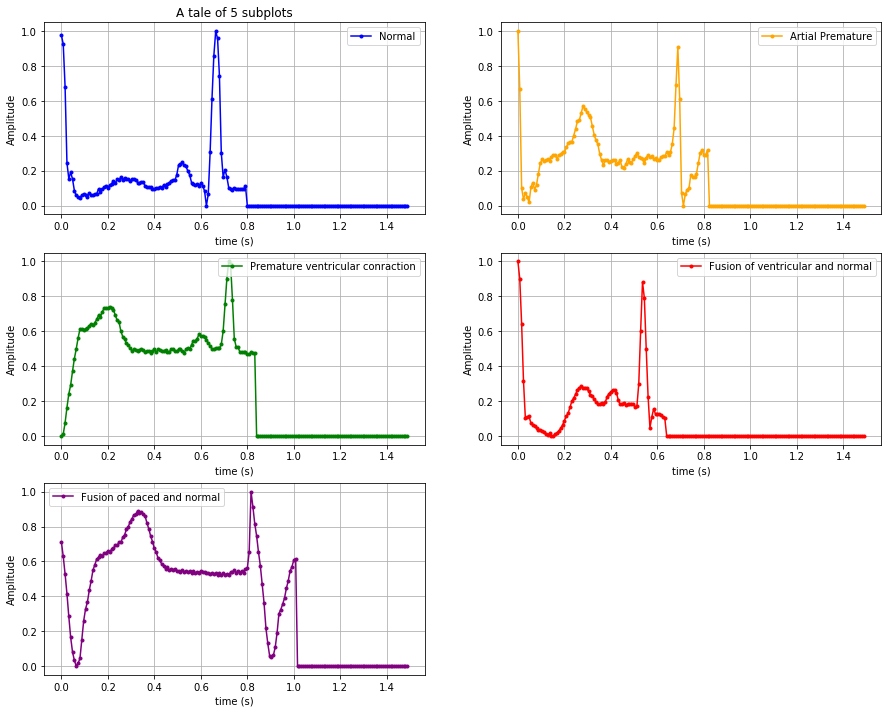

In [35]:
# A TALE of 5 subplots
x = np.arange(0, 187)*8/1000 #turn to ms 

plt.figure(figsize=(15,12))
# 9,12,4,123,23 for sample values
plt.subplot(3, 2, 1)

plt.plot(x, X[C0, :][0], '.-',color="blue", label="Normal")
plt.title('A tale of 5 subplots')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(x, X[C1, :][0], '.-',color="orange", label="Artial Premature")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 2, 3)
plt.plot(x, X[C2, :][0], '.-',color="green", label="Premature ventricular conraction")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(x, X[C3, :][0], '.-',color="red", label="Fusion of ventricular and normal")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 5)

plt.plot(x, X[C4, :][0], '.-',color="purple",  label="Fusion of paced and normal")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.show()

##  Take a random distribution

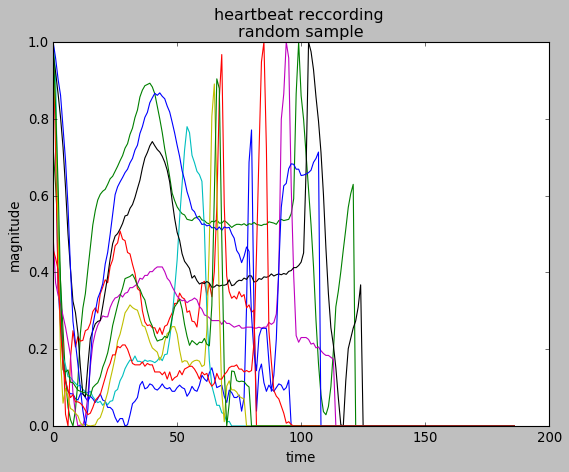

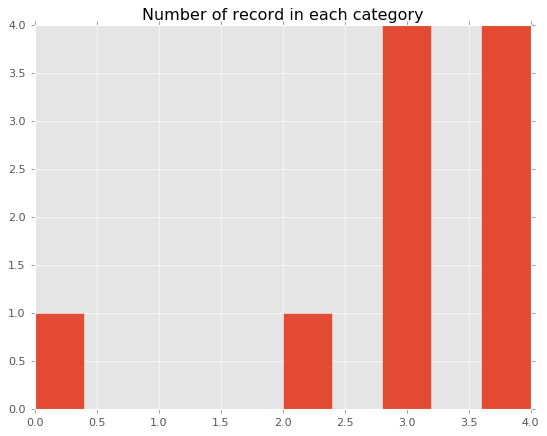

In [36]:
# take a random distribution from balanced database
sample = train_df.sample(10)#10 is number of sumples 
#sample = mit_train_data.sample(10)#10 is number of sumples

# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

## STUDY THE CATEGORIES

In [37]:
#  take one sample per class and store it in a dataframe in order to have an exmeple.
c=mit_train_data.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(10))

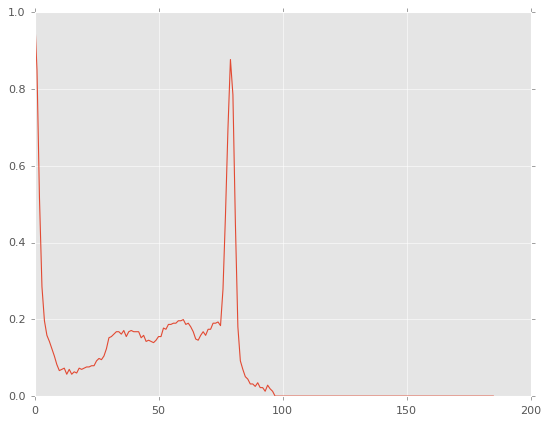

In [38]:
 plt.plot(c.iloc[1,:186]) #A normal signal from sample c

In [39]:
# A representation for all the class. 
# We take all the signal and map them. 
# Like that we have an estimation what the signal can look like.

# min_ = Minimum value of x 
# size = Maximum value of x


def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()
    

1300000
1300000


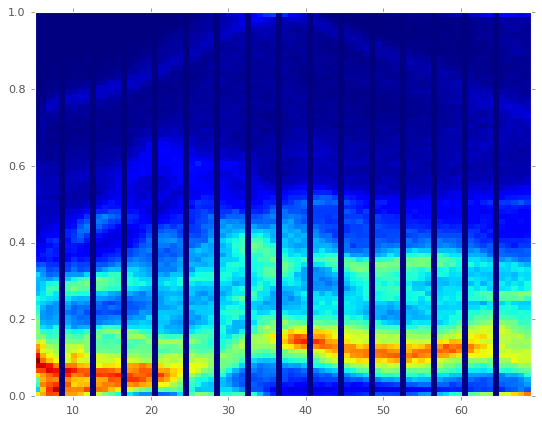

In [40]:
plot_hist(0,70,5)

## ADDING NOISE TO SIGNAL

In [41]:
# function that adds noise
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

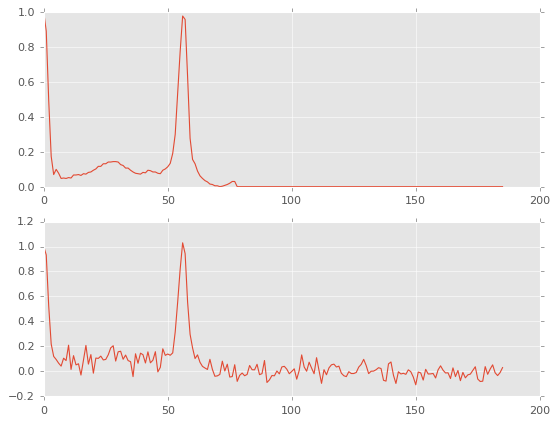

In [42]:
# Collect one sample 
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
tempo=c.iloc[0,:186]

# Add noise to the sample 
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [1]:
test= pd.read_csv("../input/ecgtest1/test1.txt", header=None)
test1= pd.read_csv("../input/test1transpose/test1transpose.csv", header=None)




NameError: name 'pd' is not defined

In [43]:
plt.plot(test1[2:3]

SyntaxError: unexpected EOF while parsing (<ipython-input-43-c34fd060194e>, line 1)

In [ ]:
time=test.iloc[len(test1)-1,0]
plt.plot(test1.iloc[1:time,0],test1.iloc[1:time,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')
print(time)

In [ ]:
t1=75
t2=180

plt.plot(test1[1][:])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

In [3]:
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test1.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)


t1=75
t2=190
plt.plot(normalized[t1:t2,1])
plt.title('Signal vs data points, every point is 8ms')
plt.ylabel('Amplitude')
plt.xlabel('data points')

NameError: name 'test' is not defined

In [ ]:
plt.plot(normalized[0:370,1])
plt.title('Signal vs data points, every point is 8ms')
plt.ylabel('Amplitude')
plt.xlabel('data points')

In [ ]:
normalized=pd.DataFrame(normalized)
tt1=75
tt2=190
plt.plot(normalized.iloc[t1:t2,0],normalized.iloc[t1:t2,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

## ONE HOT ENCODING

In [44]:
mit_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [45]:
#One hot encoding for categorical target
#Since we will be using neural networks for our classification model, 
#our output classes need to be turned into a numerical representation. We use one hot encoding (from sklearn package) to do this.



train_target = mit_train_data[187]
train_target = train_target.values.reshape(87554,1)
#one hot encode train_target

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_target)

# 3. Transform
onehotlabels = enc.transform(train_target).toarray()
onehotlabels.shape

target = onehotlabels

In [46]:
# Now our classes change from "0", "1", etc. to a vector of 0s and 1s shown below.
target[0]

array([1., 0., 0., 0., 0.])

In [ ]:
## Split training data 75:25 into a training set and validation set. 

In [47]:
#remove ground truth labels from training df
#train/test split


from sklearn.model_selection import train_test_split

X = mit_train_data
X = X.drop(axis=1,columns=187)

X_train, X_valid, Y_train, Y_valid = train_test_split(X,target, test_size = 0.25, random_state = 36)
X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)
Y_train = np.asarray(Y_train)
Y_valid = np.asarray(Y_valid)

#X_train.reshape((1, 2403, 187))
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
print(X_train.shape)
print(Y_train.shape)
# 2,403 training heartbeats and 802 validation heartbeats 
# for a 75:25 train-test split. 


(65665, 187, 1)
(65665, 5)


## MODEL

In [ ]:
# MODEL 1 https://www.kaggle.com/freddycoder/heartbeat-categorization

In [48]:
# Separate features and targets

from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3 

In [248]:
# Keras model to make prediction
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=100)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Epoch 1/10
87554/87554 [==============================] - 5s 61us/step - loss: 0.2788 - accuracy: 0.9229
Epoch 2/10
87554/87554 [==============================] - 5s 55us/step - loss: 0.1620 - accuracy: 0.9550
Epoch 3/10
87554/87554 [==============================] - 5s 56us/step - loss: 0.1308 - accuracy: 0.9641
Epoch 4/10
87554/87554 [==============================] - 5s 57us/step - loss: 0.1166 - accuracy: 0.9679
Epoch 5/10
87554/87554 [==============================] - 5s 55us/step - loss: 0.1078 - accuracy: 0.9704
Epoch 6/10
87554/87554 [==============================] - 5s 55us/step - loss: 0.0993 - accuracy: 0.9717
Epoch 7/10
87554/87554 [==============================] - 5s 54us/step - loss: 0.0945 - accuracy: 0.9726
Epoch 8/10
87554/87554 [==============================] - 5s 55us/step - loss: 0.0906 - accuracy: 0.9738
Epoch 9/10
87554/87554 [==============================] - 5s 54us/step - loss: 0.0864 - accuracy: 0.9752
Epoch 10/10
87554/87554 [==============================

ValueError: Error when checking input: expected dense_4_input to have shape (187,) but got array with shape (1,)

# PREDICTION OF MODEL WITH ARDUINO SAMPLE AS INPUT

In [249]:
ytest= pd.DataFrame()
ytest=ytest.dropna()
normalized = pd.DataFrame(normalized)
lst_seq = np.arange(0,700)
for x in lst_seq:
    normtest=normalized.loc[1, 0+x:186+x]
    normtest = pd.DataFrame(normtest).transpose()
    normtest
    ytest[x] = model.predict_classes(normtest)
#print(ytest)

## MEAN OF CATEGORIES

In [250]:
np.mean(ytest.transpose())

0    0.865714
dtype: float64

## PLOT OF CATEGORIES

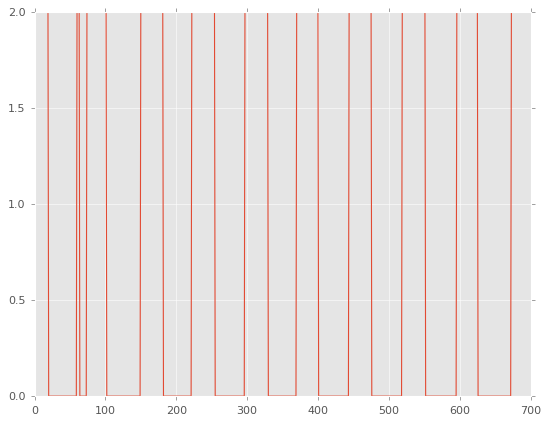

In [251]:
plt.plot(ytest.transpose())